In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import cv2
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from matplotlib import cm
from scipy import ndimage
import math
import csv
import time

In [26]:
%matplotlib inline
#%matplotlib widget
#Set up figure size and DPI for screen demo
plt.rcParams['figure.figsize'] = (6,4)
plt.rcParams['figure.dpi'] = 150

In [ ]:
%matplotlib notebook

In [3]:
from scipy.spatial.transform import Rotation as R

def getAxisVectors(x, y, z):
    r = R.from_euler('xyz', [x,y,z], degrees=True)
    return np.array(r.as_matrix())

In [10]:
def updateOrientation(rotationMatrix):
    global quiver_x
    global quiver_y
    global quiver_z
    
    quiver_x.remove()
    quiver_y.remove()
    quiver_z.remove()

    x = rotationMatrix[0]
    y = rotationMatrix[1]
    z = rotationMatrix[2]
    print(rotationMatrix)
    quiver_x = ax.quiver(0,0,0,x[0],x[1],x[2],color='g')
    quiver_y = ax.quiver(0,0,0,y[0],y[1],y[2],color='r')
    quiver_z = ax.quiver(0,0,0,z[0],z[1],z[2],color='b')

In [30]:
def animate(i):
    read_file = open('visualization/data/VID_20220612_035819_processed.csv', 'r+')
    reader = csv.reader(read_file)
    
    orientation = next((x for i, x in enumerate(reader) if i == i), None) #orientation at i'th row
    rotationMatrix = getAxisVectors(x=float(orientation[0]), y=float(orientation[1]),z=float(orientation[2]))
    if i == 0:
        print(rotationMatrix)
    updateOrientation(rotationMatrix)

    
    fileName = 'VID_20220612_035819'
    cap = cv2.VideoCapture('visualization/data/' + fileName + '.mp4')
    _, curr_frame = cap.read()
    RGB_img = cv2.cvtColor(curr_frame, cv2.COLOR_BGR2RGB)
    Rotated_img = ndimage.rotate(RGB_img, 270)

    ay.imshow(Rotated_img)

    #Update image
    #ay = 'https://learnopencv.com/wp-content/uploads/2020/08/raft-and-raft-s.png'

# Visualization based from CSV file

### Angle to vector

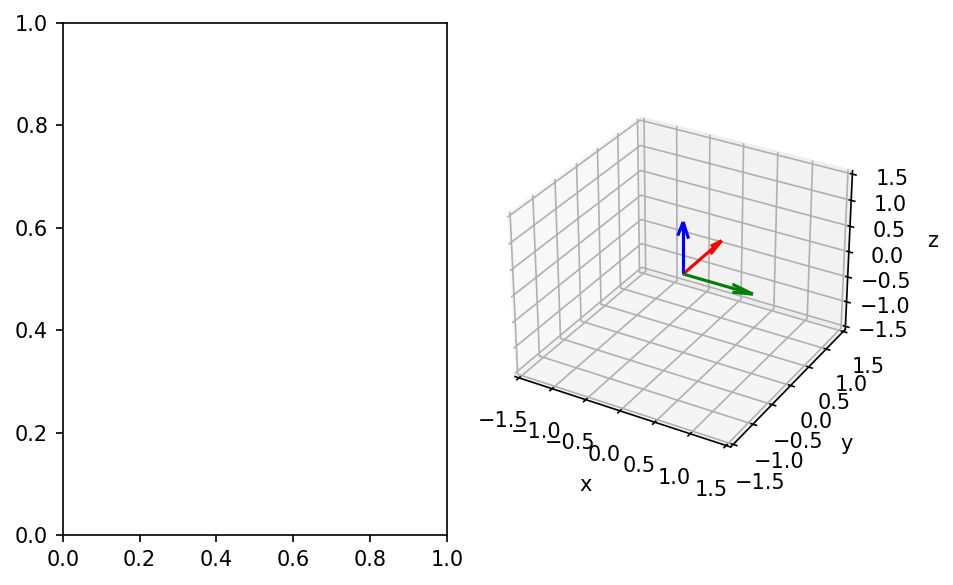

In [31]:
fig = plt.figure()
plt.rcParams["figure.autolayout"] = True
ax = fig.add_subplot(122, projection='3d')
ay = fig.add_subplot(121)

ax.set_xlim3d([-1.5,1.5])
ax.set_ylim3d([-1.5,1.5])
ax.set_zlim3d([-1.5,1.5])

ay.set_xlim([0,1920])
ax.set_ylim([0,1980])

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

"""Initiation orientation"""
quiver_x = ax.quiver(0,0,0,1,0,0,color='g')
quiver_y = ax.quiver(0,0,0,0,1,0,color='r')
quiver_z = ax.quiver(0,0,0,0,0,1,color='b')

"""Animation"""
ani = animation.FuncAnimation(fig, animate, frames=2206, interval=33.3333333)
fig.tight_layout()

plt.show()